In [63]:
import sys
sys.path.append('../../')

from IPython.core.display import display
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [64]:
# settings
random_state = 2020
np.random.seed(random_state)
CMAP = 'viridis'
dim = 128

In [65]:
# import node embeddings
df = pd.read_csv(
    f"./data/facebook_alpha-0.1_beta-0.1_ws-10_neg-5_lr-0.025_icom-36_ind-36_ds-0.0_d-{dim}_type-BGMM_k-10.txt",
    sep="\t| ",
    header=None
)
df = df.rename(columns={0: 'node'})
df.set_index(['node'], inplace=True)

/Users/anton/miniconda3/envs/MT/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [66]:
# import train
train = pd.read_csv("./data/facebook_train.csv", index_col=0)
train

,u,v
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [67]:
# import predicted labels
labels = np.genfromtxt(f"./data/labels_pred_BGMM_d{dim}_k10.txt")
labels

array([0., 5., 9., ..., 6., 6., 6.])

In [68]:
df['label'] = labels

In [69]:
display(df)
display(df.describe())

,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,128,label
node,,,,,,,,,,,,,,,,,,,,,
0,1.339128,0.185768,0.094387,0.028050,-1.108014,-1.309047,-0.377820,-1.788771,1.561685,-1.615455,...,-2.508975,-0.495331,0.731213,1.673947,0.146874,-1.560871,1.490491,2.336874,0.918792,0.0
1,0.637479,0.051010,-0.150316,0.159893,-0.405086,-0.240235,-0.469979,-0.705891,0.561779,-0.892617,...,-1.450744,-0.187287,0.336546,0.789207,-0.149343,-0.433333,0.412500,0.419875,0.323439,5.0
2,0.178027,0.364577,-0.009309,-0.349540,-0.401864,-0.621560,0.057252,-0.914340,0.678064,-0.461156,...,-0.635244,-0.071813,0.010921,0.372460,0.187321,-0.304614,0.405106,0.914100,0.037464,9.0
3,0.561832,-0.089560,0.137567,0.214021,-0.260968,-0.020298,-0.187448,-0.994636,0.586645,-0.789595,...,-1.429252,-0.283856,0.386768,0.959525,0.026923,-0.372669,0.546174,0.708606,0.260183,6.0
4,0.373659,-0.094094,-0.147163,-0.201390,-0.406716,-0.619929,0.305723,-0.682918,0.793524,-0.305176,...,-0.808432,-0.097911,0.057090,0.481623,0.157351,-0.438132,0.296040,0.855389,0.129789,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,0.344782,-0.367673,-0.387626,0.477303,0.207754,0.123088,0.054337,0.143107,0.000952,0.111579,...,-0.166604,0.261408,-0.039707,0.500547,-0.448285,0.197055,0.603622,0.051191,-0.580453,6.0
4034,0.349901,-0.344832,-0.361063,0.412082,0.235477,0.156236,-0.063146,0.117850,-0.026587,0.024229,...,-0.116655,0.230651,0.010614,0.458247,-0.403625,0.207094,0.603992,0.083834,-0.520060,6.0
4036,0.274940,-0.316169,-0.382255,0.415992,0.222673,0.098051,0.028109,0.117534,0.035170,0.047799,...,-0.175325,0.286692,0.015072,0.332629,-0.444580,0.197146,0.596902,0.039525,-0.583024,6.0


,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,128,label
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,...,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000
mean,0.254994,0.277835,-0.164388,-0.073278,0.041296,-0.045288,0.331631,0.028108,-0.066715,0.045796,...,-0.111368,0.080548,0.114097,0.094477,0.040162,-0.090280,0.256136,-0.159215,-0.185491,4.467457
std,0.319276,0.474198,0.248408,0.247338,0.349691,0.370582,0.467594,0.590872,0.751118,0.500528,...,0.649312,0.556443,0.533549,0.465944,0.467383,0.373929,0.215631,1.005380,0.532362,2.833098
min,-0.406656,-0.568981,-1.605369,-1.368962,-1.108014,-1.527247,-0.703769,-1.788771,-2.134580,-1.615455,...,-2.508975,-1.156764,-0.991954,-2.014699,-1.401742,-1.560871,-0.288975,-4.493262,-1.729752,0.000000
25%,0.030098,-0.010859,-0.273594,-0.237030,-0.231607,-0.156510,0.037107,-0.208956,-0.338660,-0.189795,...,-0.306672,-0.149494,-0.167836,-0.075671,-0.162476,-0.232871,0.095258,-0.139115,-0.474844,3.000000
50%,0.209008,0.129522,-0.127311,-0.053938,0.059979,-0.026121,0.221157,-0.025495,-0.087339,-0.017883,...,-0.083766,-0.003784,0.016329,0.098332,-0.008397,-0.003910,0.222779,0.039407,-0.262980,4.000000
75%,0.400926,0.389439,-0.010331,0.081483,0.297787,0.128375,0.464929,0.137444,0.058060,0.140708,...,0.130450,0.181498,0.203829,0.366235,0.207873,0.159599,0.396928,0.253435,-0.015526,7.000000
max,1.637774,1.935641,0.432778,0.786001,1.429531,1.077459,1.939735,2.357463,2.456897,1.788763,...,2.969436,3.535834,2.212559,1.673947,1.965161,0.576316,1.686874,2.336874,1.857677,9.000000


In [70]:
# get nx train graph
G = nx.from_pandas_edgelist(train, "u", "v")

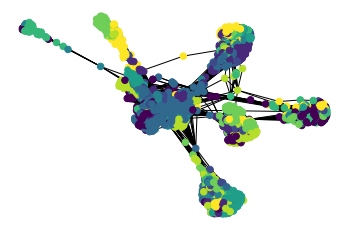

In [71]:
# plot spring graph
spring_pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx(G,
                 node_color=df.label,
                 pos=spring_pos,
                 cmap=plt.get_cmap(CMAP),
                 nodelist=sorted(G.nodes()),
                 with_labels=False,
                 node_size=42)
plt.savefig(f"./plots/graph_d{dim}.png")


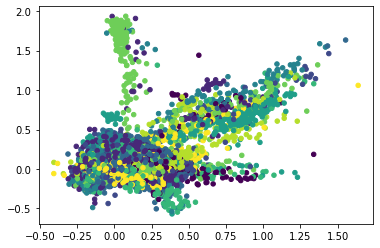

In [72]:
# plot embedding
plt.scatter(df[1], df[2], 20, c=df.label, marker="o", cmap=CMAP)
plt.savefig(f"./plots/node_emb_d{dim}.png")